In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
import importlib.resources
from pyslime import slime
from pyslime import utils as pu

import pandas as pd
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
import glob
import pickle
from astropy.table import Table, vstack, unique
from astropy.cosmology import Planck15 as cosmo

from pyslime.pipeline import catalogs, interpolate


datadir = "/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/"
packagedir = "/Users/mwilde/python/pyslime/pyslime/data/"
dropboxdir = "/Users/mwilde/Dropbox/slime-mold/data/final_data/"
pipedatadir = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/"


In [2]:
glob.glob(datadir+"*")

['/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/BP_z=0.5.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/BP_z=0.0.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/SDSS_z=44-476mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_SGC_z=2000-3000mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=2000-3000mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=1500-2100mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_SGC_z=1500-2100mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=900-1600mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_SGC_z=900-1600mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=0-1000mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_SGC_z=0-1000mpc.zip',
 '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/BP_z=0.0',
 '/V

# this pretab is made via 
`catalogs.make_galaxy_cat_with_slimedens(datadir, packagedir)`

In [3]:
# pretab = catalogs.make_galaxy_cat_with_slimedens(datadir, pipedatadir)
pretab = Table.read(datadir+"prevac_catalog.csv", format='ascii.csv')

In [4]:
xbreak0, y_const0, pfit0, xbreak5, y_const5, pfit5 = catalogs.load_mapfuncs(pipedatadir)

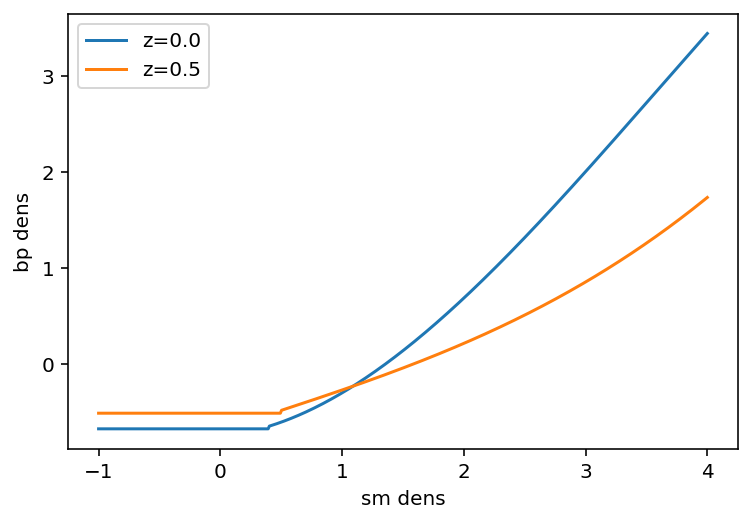

In [5]:
bins = np.linspace(-1,4, 500)


z0 = interpolate.relu_p3(bins, xbreak0, y_const0, pfit0)
z5 = interpolate.relu_p3(bins, xbreak5, y_const5, pfit5)

plt.plot(bins, z0, label='z=0.0')
plt.plot(bins, z5, label='z=0.5')
plt.xlabel('sm dens')
plt.ylabel('bp dens')
plt.legend();

Text(0.5, 0, 'dens')

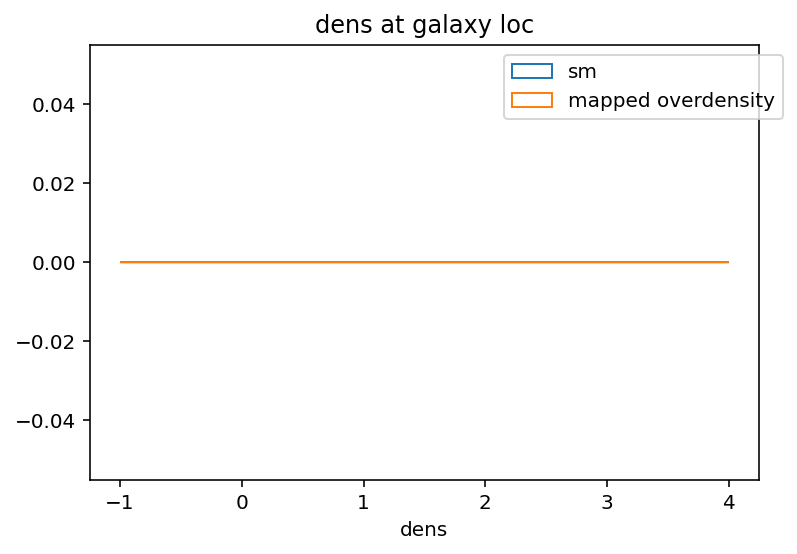

In [8]:
bins = np.linspace(-1,4, 1000)
kwargs = {}
kwargs['bins'] = bins
kwargs['histtype'] = 'step'
single_slice = pretab[pretab['MCPM_RUN'] == 7]

plt.hist(single_slice['log10_slimedens'], **kwargs, label='sm');
plt.hist(single_slice['log10_overdens'], **kwargs, label='mapped overdensity');
# plt.hist(mapfunc0(pretab['log10_slimedens']), **kwargs, label='map0');
# plt.hist(mapfunc5(pretab['log10_slimedens']), **kwargs, label='map0.5');
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("dens at galaxy loc");
plt.xlabel("dens")


Text(0.5, 0, 'dens')

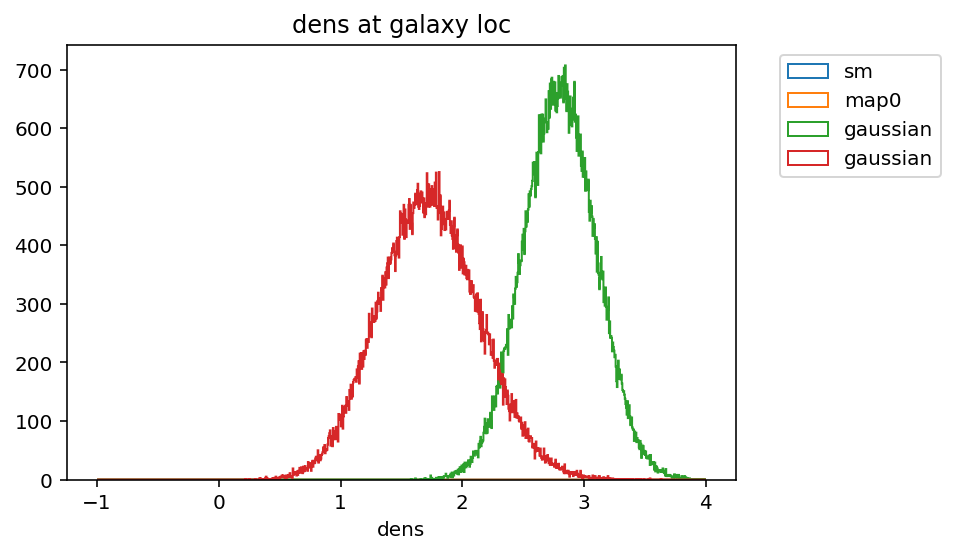

In [7]:
bins = np.linspace(-1,4, 1000)
kwargs = {}
kwargs['bins'] = bins
kwargs['histtype'] = 'step'
pretab = pretab[pretab['MCPM_RUN'] == 1]

z0 = interpolate.relu_p3(pretab['log10_slimedens'], xbreak0, y_const0, pfit0)
z5 = interpolate.relu_p3(pretab['log10_slimedens'], xbreak5, y_const5, pfit5)

g = np.random.normal(2.8, 0.3, 100000)

zg = interpolate.relu_p3(g, xbreak0, y_const0, pfit0)

plt.hist(pretab['log10_slimedens'], **kwargs, label='sm');
# plt.hist(pretab['log10_overdens'], **kwargs, label='rho');
plt.hist(z0, **kwargs, label='map0');
# plt.hist(x(pretab['log10_slimedens']), **kwargs, label='map0');
plt.hist(g, **kwargs, label='gaussian')
plt.hist(zg, **kwargs, label='gaussian')
# plt.hist(mapfunc5(pretab['log10_slimedens']), **kwargs, label='map0.5');
plt.legend(bbox_to_anchor=(1.05,1))
plt.title("dens at galaxy loc");
plt.xlabel("dens")
# plt.xlim(1.45, 1.58)


In [8]:
df = pretab.to_pandas()

In [9]:
galcat = Table.read(datadir + "galaxy_cat_forSlime.csv", format="ascii.ecsv")

In [10]:
galcat = galcat.to_pandas()

In [11]:
spike = df.loc[(df.log10_overdens > 1.4) & (df.log10_overdens < 1.6)]

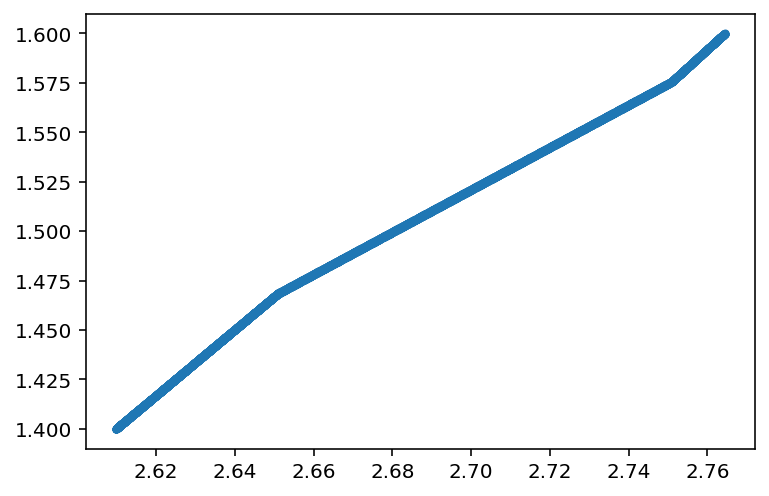

In [12]:
plt.plot(spike.log10_slimedens, spike.log10_overdens, '.')
# plt.plot(df.log10_slimedens, df.log10_overdens, '.')

In [13]:
print(len(df))
df.nunique()

68135


ra                 68135
dec                68135
z                  68135
mstars             68135
lumdist            68135
MCPM_RUN               1
log10_slimedens    66466
log10_overdens     66466
dtype: int64

In [14]:
print(len(spike))
spike.nunique()

16476


ra                 16476
dec                16476
z                  16476
mstars             16476
lumdist            16476
MCPM_RUN               1
log10_slimedens    16023
log10_overdens     16023
dtype: int64

In [15]:
spike.log10_slimedens.min(), spike.log10_slimedens.max()

(2.6098406314849854, 2.7644264698028564)

# Here are the duplicated values in slimedens

In [16]:
def get_dups(df, col):
    dups = pd.concat(g for _, g in df.groupby(col) if len(g) > 1)
    return dups

get_dups(df, "log10_slimedens")

,ra,dec,z,mstars,lumdist,MCPM_RUN,log10_slimedens,log10_overdens
67405,167.908493,42.254635,0.196713,1.055258e+11,992.903911,1,2.126126,0.807812
67523,168.015952,42.333165,0.196891,6.872933e+10,993.908742,1,2.126126,0.807812
32417,204.891715,57.857216,0.130616,2.703714e+10,633.338713,1,2.128316,0.810253
66912,153.471757,42.178477,0.195761,5.174791e+10,987.556189,1,2.128316,0.810253
67838,209.439229,40.829097,0.197452,9.677347e+10,997.064762,1,2.129879,0.811996
...,...,...,...,...,...,...,...,...
6414,146.595600,42.848749,0.073085,5.005240e+10,341.129867,1,3.274286,2.477181
16633,183.989843,59.182344,0.096401,1.402718e+11,457.133875,1,3.292909,2.510173
16750,183.895352,59.094014,0.096654,8.269591e+10,458.411282,1,3.292909,2.510173
14082,239.501147,27.300622,0.090147,7.737071e+10,425.689397,1,3.295741,2.515190


In [17]:
slimedir = '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=0-1000mpc'

slimeobj = slime.Slime.get_slime(slimedir, standardize=True)

/Users/mwilde/python/pyslime/pyslime/slime.py:122: RuntimeWarning: divide by zero encountered in log10
  slimeobj.data = np.log10(slimeobj.data)


In [18]:
tab = galcat
lumcut = [0, 1000]
flag = 1 

if "NGC" in slimeobj.name:
    subtable = tab[tab["survey"] == "LRG_NGC"]
elif "SGC" in slimeobj.name:
    subtable = tab[tab["survey"] == "LRG_SGC"]
elif "SDSS" in slimeobj.name:
    subtable = tab[tab["survey"] == "SDSS"]
else:
    print("there is no subtable, chck this!!!!")

t = pd.DataFrame()
t["ra"] = subtable["RA"]
t["dec"] = subtable["DEC"]
t["z"] = subtable["Z"]
t["mstars"] = subtable["MassStars"]
t["lumdist"] = subtable["lumDist"]
t["MCPM_RUN"] = flag

cut = t[(t["lumdist"] > lumcut[0]) & (t["lumdist"] < lumcut[1])]
galtrace = slimeobj.sky_to_data(
    cut["ra"], cut["dec"], cut["z"], check_bounds=True)

In [19]:
galtrace.shape

(68135,)

In [27]:
rho = mapfunc0(galtrace)

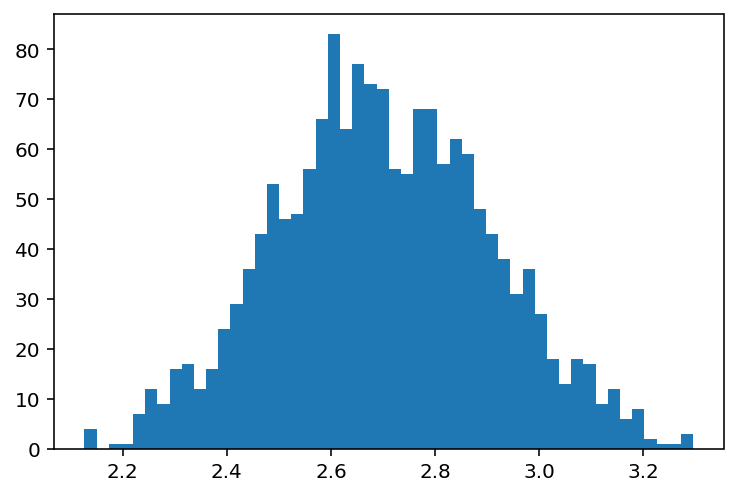

In [25]:
u, c = np.unique(galtrace, return_counts=True)
dup = u[c > 1 ]
plt.hist(dup, bins=50);

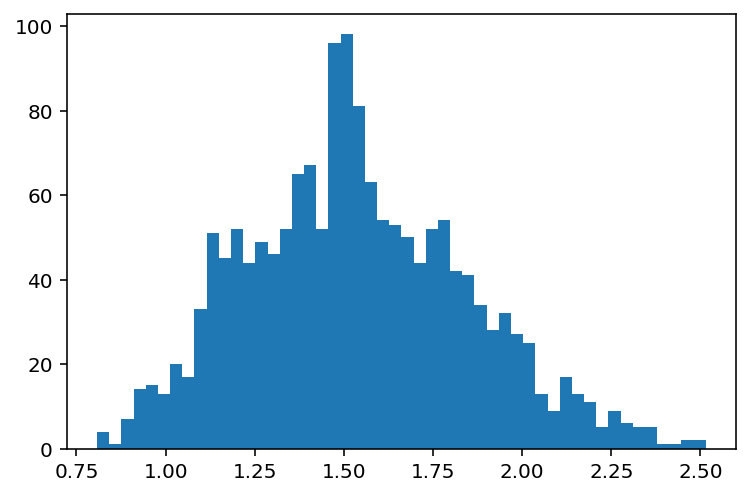

In [28]:
u, c = np.unique(rho, return_counts=True)
dup = u[c > 1 ]
plt.hist(dup, bins=50);

In [94]:
df_trace = pd.Series({"galtrace":galtrace})

In [96]:
df_trace.duplicated()

SystemError: <built-in function duplicated_object> returned a result with an error set

In [86]:
cut

,ra,dec,z,mstars,lumdist,MCPM_RUN
324901,152.451973,24.655543,0.000212,2.362567e+05,0.937959,1
324902,208.696319,58.665048,0.005390,2.948780e+07,23.954430,1
324903,138.813560,40.917111,0.008841,1.113251e+08,39.393806,1
324904,215.471815,39.982492,0.017559,2.658272e+08,78.749883,1
324905,142.387112,13.192791,0.019814,8.490319e+08,89.015581,1
...,...,...,...,...,...,...
393031,238.575565,4.819224,0.197966,1.722746e+11,999.956445,1
393032,210.453419,9.556305,0.197968,1.160037e+11,999.969655,1
393033,168.557515,19.675774,0.197970,1.195845e+11,999.980993,1
393034,161.390985,60.709556,0.197972,4.158885e+10,999.991947,1


In [95]:
get_dups(df_trace, "galtrace")

ValueError: Grouper and axis must be same length